In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import warnings 
import eli5 
from eli5.sklearn import PermutationImportance

warnings.filterwarnings('ignore')


In [2]:
import pkg_resources

# List of your specific packages
required_packages = [
    "pandas",
    "numpy",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "tensorflow",
    "eli5"
]

# Get the installed versions of these packages
with open("requirements.txt", "w") as f:
    for package in required_packages:
        try:
            version = pkg_resources.get_distribution(package).version
            f.write(f"{package}=={version}\n")
        except pkg_resources.DistributionNotFound:
            print(f"Package {package} not found in the environment.")


In [116]:
df = pd.read_csv(r'Telco-Customer-Churn.csv')
print(df.head())
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [117]:
df.TotalCharges.values
df1 = df[df.TotalCharges != ' ']
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [118]:
df1.TotalCharges.dtypes

dtype('float64')

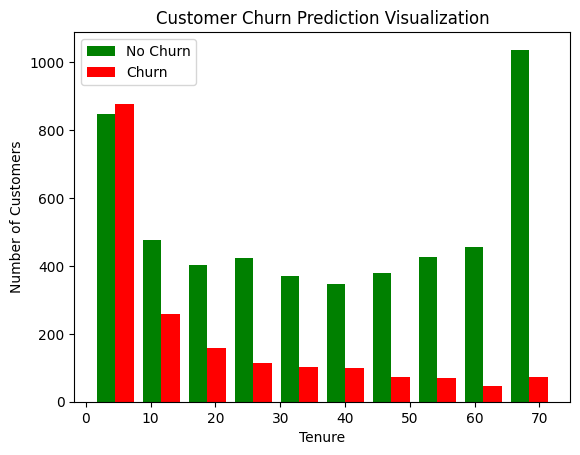

In [119]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')    
plt.hist([tenure_churn_no, tenure_churn_yes], color = ['green', 'red'], label = ['No Churn', 'Churn'])
plt.legend()
plt.show()

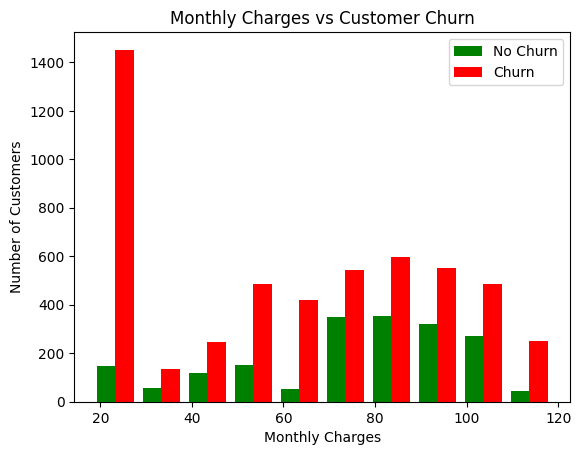

In [120]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Monthly Charges vs Customer Churn')
plt.hist([mc_churn_yes, mc_churn_no], color = ['green', 'red'] , label = ['No Churn', 'Churn'])
plt.legend()
plt.show()

In [121]:
def unique_values(column): 
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df1[column].unique()}')

unique_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [122]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
df1['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

for column in yes_no_columns:
    df1[column].replace({'Yes': 1, 'No': 0}, inplace=True)

unique_values(df1)

gender: [0 1]
Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [123]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=False)
bool_cols = df2.select_dtypes(include=bool).columns
df2[bool_cols] = df2[bool_cols].astype(int)
df2.dtypes




gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [124]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4878,1,0,1,0,0.422535,1,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2705,0,0,1,0,1.000000,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4433,0,0,0,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [125]:
x = df2.drop('Churn', axis='columns')
y = df2['Churn']


In [126]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_resampled, y_resampled = over_sample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=5)
len(x_train.columns)

26

In [127]:

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6714 - loss: 0.6002
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7736 - loss: 0.4792
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7754 - loss: 0.4696
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7775 - loss: 0.4641
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7789 - loss: 0.4595
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7821 - loss: 0.4556
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7829 - loss: 0.4527
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7843 - loss: 0.4505
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7870 - loss: 0.4477
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7873 - loss: 0.4454
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7916 - loss: 0.4436
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

In [128]:
model.evaluate(x_test, y_test)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8015 - loss: 0.4258


[0.42577776312828064, 0.8015488982200623]

In [129]:
yp = model.predict(x_test)
yp[:5]

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


array([[0.9272692 ],
       [0.25370947],
       [0.8805932 ],
       [0.70115143],
       [0.00705378]], dtype=float32)

In [130]:
y_test[:5]


9238    1
6020    0
8112    1
2049    1
6185    0
Name: Churn, dtype: int64

In [131]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)



In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1025
           1       0.80      0.81      0.80      1041

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



----------------Confusion matrix visualiztion----------------


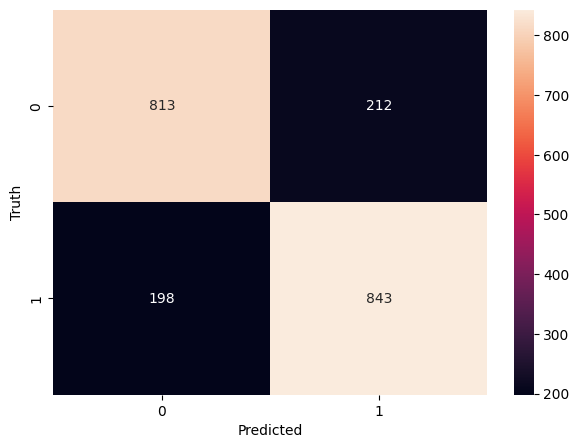

In [133]:
print('----------------Confusion matrix visualiztion----------------')
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()




       FEATURE IMPORTANCE ANALYSIS (PFI)

--- Top 5 Factors That MOST INFLUENCE the Model's Prediction ---
                               Attribute  Importance
0                         MonthlyCharges    0.236205
1                      Contract_Two year    0.125557
2                      Contract_One year    0.120523
3                                 tenure    0.120039
4  PaymentMethod_Credit card (automatic)    0.095547

--- 4 Factors with the LEAST/NO Influence (Lowest PFI Score) ---
           Attribute  Importance
25  PaperlessBilling   -0.000484
24     SeniorCitizen    0.002711
23            gender    0.004550
22  DeviceProtection    0.004840

✅ Feature importance analysis complete. Check the generated plot for visualization.


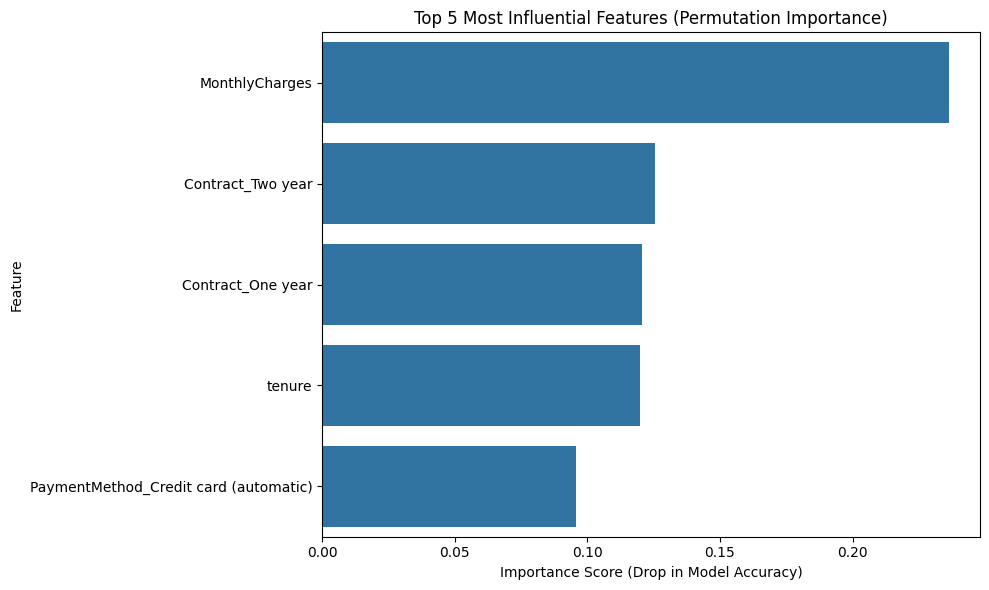

In [134]:
from sklearn.metrics import accuracy_score
# --- REQUIRED FUNCTION FOR PFI (to avoid the TypeError) ---
def keras_accuracy_score(estimator, X, y):
    # Predict probabilities
    y_proba = estimator.predict(X, verbose=0)
    # Convert probabilities to class labels (1 if > 0.5, else 0)
    y_pred = (y_proba > 0.5).astype(int)
    # Calculate and return accuracy
    return accuracy_score(y, y_pred)


# === STEP: FEATURE IMPORTANCE ANALYSIS (PFI) ===

print("\n\n" + "="*50)
print("       FEATURE IMPORTANCE ANALYSIS (PFI)")
print("="*50 + "\n")

# 1. Calculate Permutation Importance
# This step measures the drop in accuracy when a feature is randomly shuffled.
# The 'model' here refers to your trained Keras model.
perm = PermutationImportance(model, scoring=keras_accuracy_score, random_state=42).fit(x_test, y_test)

# 2. Extract and Format Results into a DataFrame
# 'eli5.explain_weights_df' extracts the results for us.
importances_df = eli5.explain_weights_df(perm, feature_names=list(x_test.columns))

# Rename columns for clarity and sort by importance
importances_df.rename(columns={'feature': 'Attribute', 'weight': 'Importance'}, inplace=True)
importances_df.drop(columns=['std'], inplace=True)
importances_df = importances_df.sort_values(by='Importance', ascending=False)


# 3. Separate Churn (Positive Impact) and Loyalty (Negative Impact) Factors

# For PFI, positive 'Importance' means the feature is influential.
# We treat the highest positive values as the top factors.
# NOTE: PFI scores don't indicate churn vs. loyalty directly like Logistic Regression coefficients do.
# They just show the magnitude of impact. For plotting, we focus on the highest magnitude.

# Let's get the top 8 most influential predictors
top_factors = importances_df.head(5).copy()

# For a "loyalty" list, we can use the features with the lowest (most negative) impact score,
# although for PFI, negative often means the model was unstable on that feature.
# We will focus on the most reliable (highest positive) scores for the main plot.
top_loyalty_factors_pfi = importances_df.tail(4).sort_values(by='Importance', ascending=True).copy()


print("--- Top 5 Factors That MOST INFLUENCE the Model's Prediction ---")
print(top_factors)

print("\n--- 4 Factors with the LEAST/NO Influence (Lowest PFI Score) ---")
print(top_loyalty_factors_pfi)


# 4. Visualize the Top Influential Factors
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Attribute', data=top_factors)
plt.title('Top 5 Most Influential Features (Permutation Importance)')
plt.xlabel('Importance Score (Drop in Model Accuracy)')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance_pfi.png')
# plt.show() # Disabled to save the file as per guidelines

print("\n✅ Feature importance analysis complete. Check the generated plot for visualization.")

In [135]:
print("\n\n" + "="*50)
print("       FEATURE IMPORTANCE ANALYSIS (PFI)")
print("="*50 + "\n")

perm = PermutationImportance(model, scoring=keras_accuracy_score, random_state=42).fit(x_test, y_test)
importances_df = eli5.explain_weights_df(perm, feature_names=list(x_test.columns))

# Rename columns for clarity and sort by importance
importances_df.rename(columns={'feature': 'Attribute', 'weight': 'Importance'}, inplace=True)
importances_df.drop(columns=['std'], inplace=True)
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print("✅ Feature Importance analysis completed")



       FEATURE IMPORTANCE ANALYSIS (PFI)

✅ Feature Importance analysis completed


--- Top 5 Factors That MOST INFLUENCE the Model's Prediction ---
                               Attribute  Importance
0                         MonthlyCharges    0.236205
1                      Contract_Two year    0.125557
2                      Contract_One year    0.120523
3                                 tenure    0.120039
4  PaymentMethod_Credit card (automatic)    0.095547

--- 4 Factors with the LEAST/NO Influence (Lowest PFI Score) ---
           Attribute  Importance
25  PaperlessBilling   -0.000484
24     SeniorCitizen    0.002711
23            gender    0.004550
22  DeviceProtection    0.004840

✅ Feature importance analysis complete. Check the generated plot for visualization.


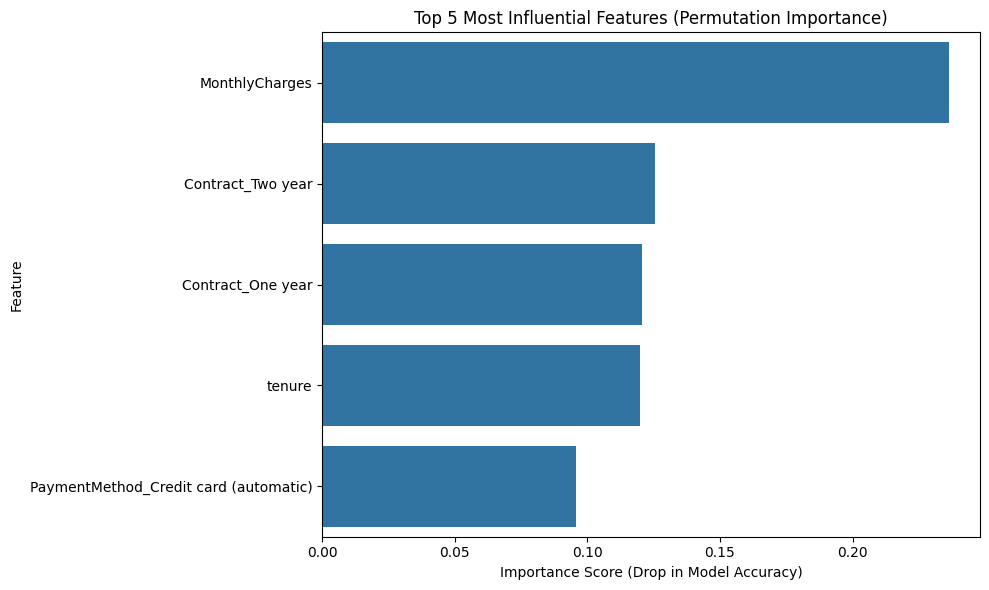

In [136]:
top_factors = importances_df.head(5).copy()

# For a "loyalty" list, we can use the features with the lowest (most negative) impact score,
# although for PFI, negative often means the model was unstable on that feature.
# We will focus on the most reliable (highest positive) scores for the main plot.
top_loyalty_factors_pfi = importances_df.tail(4).sort_values(by='Importance', ascending=True).copy()


print("--- Top 5 Factors That MOST INFLUENCE the Model's Prediction ---")
print(top_factors)

print("\n--- 4 Factors with the LEAST/NO Influence (Lowest PFI Score) ---")
print(top_loyalty_factors_pfi)


# 4. Visualize the Top Influential Factors
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Attribute', data=top_factors)
plt.title('Top 5 Most Influential Features (Permutation Importance)')
plt.xlabel('Importance Score (Drop in Model Accuracy)')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance_pfi.png')
# plt.show() # Disabled to save the file as per guidelines

print("\n✅ Feature importance analysis complete. Check the generated plot for visualization.")